In [15]:
from __future__ import print_function
from csky.ipyconfig import *
from csky import bk, analysis, coord, dists, hyp, inj, llh, pdf, selections, trial, utils
import csky as cy
import histlite as hl
import healpy as hp
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
#from icecube import astro

mp_cpus = 15
mrichman_mpl()

In [7]:
bg_1 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Background/bg_1_50000fits.npy')
bg_2 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Background/bg_2_50000fits.npy')
bg_3 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Background/bg_3_50000fits.npy')
bg_4 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Background/bg_4_50000fits.npy')
bg_5 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Background/bg_5_50000fits.npy')

AttributeError: 'numpy.ndarray' object has no attribute 'get_hist'

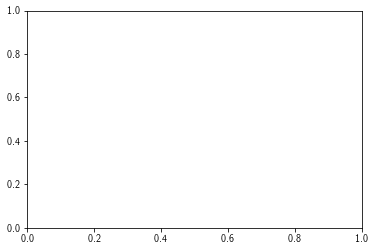

In [8]:
fig, ax = plt.subplots ()
h = bg_1.get_hist (bins=50)
hl.plot1d (ax, h.normalize (), label=r'$N_{s}=0$') #, crosses=True)
x = np.linspace (.1, h.range[0][-1], 100)
ax.semilogy (x, bg_1.eta * bg_1.chi2.pdf (x), 'k--', lw=1, label=r'$\chi_{2}^{2}$')
plt.xlabel(r'TS',fontsize=14)
plt.ylabel('Trials',fontsize=14)
#plt.ylim(0,30)
plt.title(r'$1^{\circ}$ source extension')
plt.legend()
plt.tight_layout ()
ax.tick_params(axis='both',which='major',length=8,labelsize=10)
ax.tick_params(axis='both',which='minor',length=4)

In [10]:
print(bg_1)

Chi2TSD(50000 trials, eta=0.649, ndof=1.079, median=0.191 (from fit 0.194))


In [29]:
sindec_array = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sindec_array.npy')
sindec_array_20 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sindec_array_20bins.npy')
sindec_array_30 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sindec_array_30bins.npy')
sindec_array_50 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sindec_array_50bins.npy')
test = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_0_test.npy')

sens_0 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_0_30bins.npy')
sens_0_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_0_ss_30.npy')
sens_1 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_1_30bins.npy')
sens_1_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_1_ss_30bins.npy')
sens_2 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_2_30bins.npy')
sens_2_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_2_ss_30bins.npy')
sens_3 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_3_30bins.npy')
sens_4 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_4_30bins.npy')
sens_5 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/Sensitivity/sens_5_30bins.npy')

disc_0 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_0_30bins.npy')
disc_0_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_0_ss_30bins.npy')
disc_1 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_1_30bins.npy')
disc_1_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_1_ss_30bins.npy')
disc_2 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_2_30bins.npy')
disc_2_ss = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_2_ss_30bins.npy')
disc_3 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_3_30bins.npy')
disc_4 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_4_30bins.npy')
disc_5 = np.load('/data/user/drysewyk/llh_sandbox/NumPyArrays/DiscoveryPotential/disc_5_30bins.npy')


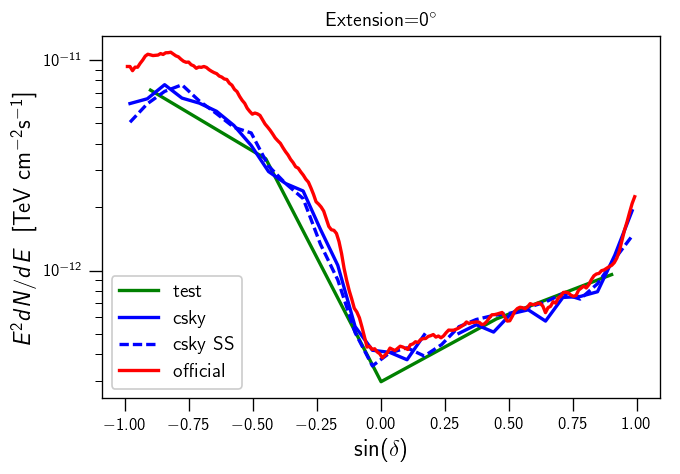

In [32]:
repo = selections.mrichman_repo

testdec = np.linspace(-0.9,0.9,5)


fig, ax = plt.subplots ()
plt.semilogy(testdec,test,label=r'test',color='green')

plt.semilogy(sindec_array_30,sens_0,label=r'csky',color='blue')
plt.semilogy(sindec_array_30,sens_0_ss,label=r'csky SS', color='blue',linestyle='--')
sd,phi = repo.get_performance('sens_E200_ps7yr')[:2]
plt.semilogy(sd,phi,color='r',label=r'official')
plt.legend(loc='lower left',fontsize=11.5)
ax.tick_params(axis='both',which='major',length=8,labelsize=10)
ax.tick_params(axis='both',which='minor',length=4)
plt.title(r'Extension=${0}^{\circ}$')
plt.xlabel(r'$\sin (\delta)$', fontsize=14)
plt.ylabel(r'$E^{2} dN/dE \ \  [\mathrm{TeV} \ \mathrm{cm}^{-2}\mathrm{s}^{-1}]$',fontsize=14)

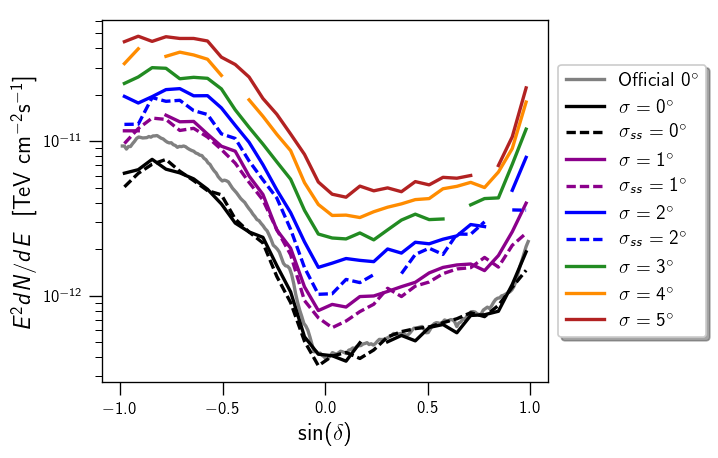

In [27]:
fig, ax = plt.subplots ()
plt.semilogy(sd,phi,color='0.5',label=r'Official ${0}^{\circ}$')
plt.semilogy(sindec_array_30,sens_0,label=r'$\sigma=0^{\circ}$',color='black')
plt.semilogy(sindec_array_30,sens_0_ss,label=r'$\sigma_{ss}=0^{\circ}$', color='black',linestyle='--')
plt.semilogy(sindec_array_30,sens_1,label=r'$\sigma=1^{\circ}$', color='darkmagenta', linestyle='-')
plt.semilogy(sindec_array_30,sens_1_ss,label=r'$\sigma_{ss}=1^{\circ}$', color='darkmagenta', linestyle='--')
plt.semilogy(sindec_array_30,sens_2,label=r'$\sigma=2^{\circ}$', color='blue')
plt.semilogy(sindec_array_30,sens_2_ss,label=r'$\sigma_{ss}=2^{\circ}$', color='blue', linestyle='--')
plt.semilogy(sindec_array_30,sens_3,label=r'$\sigma=3^{\circ}$', color='forestgreen')
plt.semilogy(sindec_array_30,sens_4,label=r'$\sigma=4^{\circ}$', color='darkorange')
plt.semilogy(sindec_array_30,sens_5,label=r'$\sigma=5^{\circ}$', color='firebrick')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fancybox=True, shadow=True, ncol=1, fontsize=11.5)

#plt.legend(loc='lower left',fontsize=11.5)
ax.tick_params(axis='both',which='major',length=8,labelsize=10)
ax.tick_params(axis='both',which='minor',length=4)
plt.xlabel(r'$\sin (\delta)$', fontsize=14)
plt.ylabel(r'$E^{2} dN/dE \ \  [\mathrm{TeV} \ \mathrm{cm}^{-2}\mathrm{s}^{-1}]$',fontsize=14)

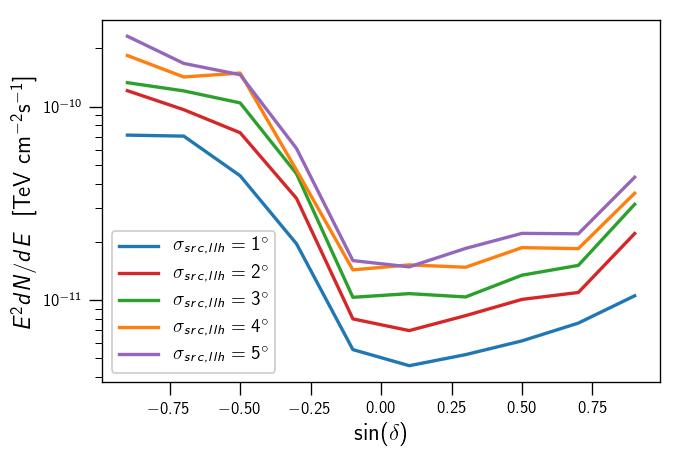

In [36]:
fig, ax = plt.subplots ()
plt.semilogy(sindec_array,disc_1,label=r'$\sigma_{src,llh}=1^{\circ}$')
plt.semilogy(sindec_array,disc_2,label=r'$\sigma_{src,llh}=2^{\circ}$')
plt.semilogy(sindec_array,disc_3,label=r'$\sigma_{src,llh}=3^{\circ}$')
plt.semilogy(sindec_array,disc_4,label=r'$\sigma_{src,llh}=4^{\circ}$')
plt.semilogy(sindec_array,disc_5,label=r'$\sigma_{src,llh}=5^{\circ}$')
plt.legend(loc='lower left',fontsize=11.5)
ax.tick_params(axis='both',which='major',length=8,labelsize=10)
ax.tick_params(axis='both',which='minor',length=4)
plt.xlabel(r'$\sin (\delta)$', fontsize=14)
plt.ylabel(r'$E^{2} dN/dE \ \  [\mathrm{TeV} \ \mathrm{cm}^{-2}\mathrm{s}^{-1}]$',fontsize=14)